# Task 1. Data Preprocessing

## Loading the dataset into a DataFrame

In [1]:
import pandas as pd
import numpy as np
# load dataset into a pandas dataframe
data = pd.read_csv('Data.csv')
data.head()

,X,Y
0,0.987988,5.098368
1,0.719720,2.516654
2,-0.403403,0.337961
3,0.107107,0.737320
4,0.345345,-0.780955


## Normalizing the feature variable

In [2]:
# Function to normalize the features: assumes the last column to be target variable (y)
def normalize(data: pd.DataFrame) -> None:
  for col in data.columns[:-1]:
    # standardizing data
    data[col] = (data[col] - data[col].mean())/data[col].std()
normalize(data)
data.head()

,X,Y
0,1.708680,5.098368
1,1.244722,2.516654
2,-0.697668,0.337961
3,0.185237,0.737320
4,0.597259,-0.780955


## Shuffle split the dataset into training and testing sets (80% train; 20% test)

In [3]:
# Function to get a desired test train split of the data; give different seed for increased randomness
def test_train_split(data: pd.DataFrame, test_size = 0.2, random_seed = 0) -> tuple[pd.DataFrame, pd.DataFrame]:
  np.random.seed(random_seed)
  # getting a shuffled permutation of the data indices
  indices = np.random.permutation(data.shape[0])
  # getting the number of indices in testing set
  data_test_size = int(data.shape[0]*test_size)
  # returning separate test and train sets
  return data.iloc[indices[:data_test_size]], data.iloc[indices[data_test_size:]]
test, train = test_train_split(data)
train

,X,Y
687,0.791152,2.195598
500,0.455302,0.955510
332,-1.507863,-1.473624
979,-0.046742,2.513249
817,-0.593797,0.133400
...,...,...
835,1.061217,2.422208
192,-0.223323,1.306205
629,-1.715605,-1.037113
559,-0.950421,0.399396


# Task 2. Polynomial Regression

## Transforming data into polynomial of n degree

In [4]:
# Function to polynomial transform data; assumes the last column to be the target variable and ignores it
def poly_transform(data: pd.DataFrame, degree: int = 3) -> None: 
  # separating columns to make polynomial
  cols = data.columns[:-1]
  f = len(cols)
  # first degree always present +1 to include last one
  for i in range(2, degree+1):
    for col in cols:
      data.insert(f+i-2, col+str(i), data[col]**i)
def insert_dummy1s(data: pd.DataFrame) -> None:
  # adding dummy ones
  data.insert(0, 'dummy1s', np.ones(data.shape[0]))
data = pd.read_csv('Data.csv')
poly_transform(data)
normalize(data)
insert_dummy1s(data)
data

,dummy1s,X,X2,X3,Y
0,1.0,1.708680,2.148360,2.542639,5.098368
1,1.0,1.244722,0.615601,0.982924,2.516654
2,1.0,-0.697668,-0.573011,-0.173081,0.337961
3,1.0,0.185237,-1.079095,0.003240,0.737320
4,1.0,0.597259,-0.718453,0.108590,-0.780955
...,...,...,...,...,...
995,1.0,1.161625,0.391926,0.798915,3.079356
996,1.0,-1.064679,0.150497,-0.615118,0.027487
997,1.0,0.448377,-0.892592,0.045944,1.068320
998,1.0,0.206011,-1.070003,0.004456,0.245188


## Performing Batch Gradient Descent on the normalized train data

In [5]:
def batch(train: pd.DataFrame, learning_rate = 0.1, max_iterations = 500) -> np.ndarray:
  X = np.array(train.iloc[:, :-1])
  Y = np.array(train.iloc[:, -1])
  # number of features except last column
  W = np.zeros(train.shape[1]-1)
  n = len(train)
  for _ in range(max_iterations):
    Y_pred = X @ W
    gradient = X.T @ (Y_pred - Y)
    W -= (learning_rate/n)*gradient
  return W
data = pd.read_csv('Data.csv')
poly_transform(data, 3)
normalize(data)
insert_dummy1s(data)
test, train = test_train_split(data)
def mse(Y_true: np.ndarray, Y_pred: np.ndarray) -> float:
  return np.mean((Y_true - Y_pred)**2)
W = batch(train, 0.5)
mse(test.iloc[:, -1], test.iloc[:, :-1] @ W)

1.0051022175940663

# Task 3. Graph Plotting

## Training and Testing Error vs Degree of polynomial

(0.9995677155216034, 0.9679280867897562)
3


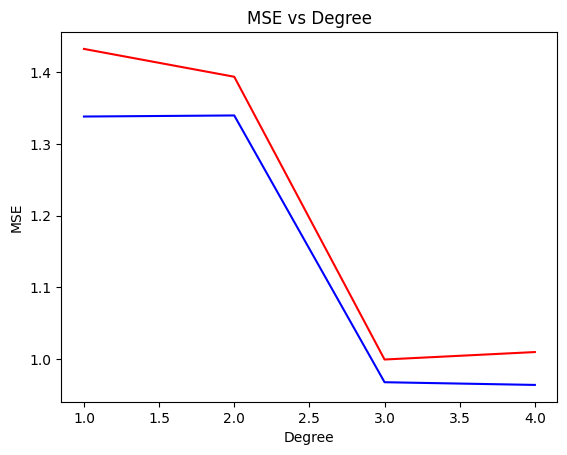

C:\Users\sbgup\AppData\Local\Temp\ipykernel_12392\3136230520.py:9: RuntimeWarning: overflow encountered in matmul
  gradient = X.T @ (Y_pred - Y)
C:\Users\sbgup\AppData\Local\Temp\ipykernel_12392\3136230520.py:9: RuntimeWarning: invalid value encountered in matmul
  gradient = X.T @ (Y_pred - Y)
C:\Users\sbgup\AppData\Local\Temp\ipykernel_12392\3136230520.py:10: RuntimeWarning: invalid value encountered in subtract
  W -= (learning_rate/n)*gradient


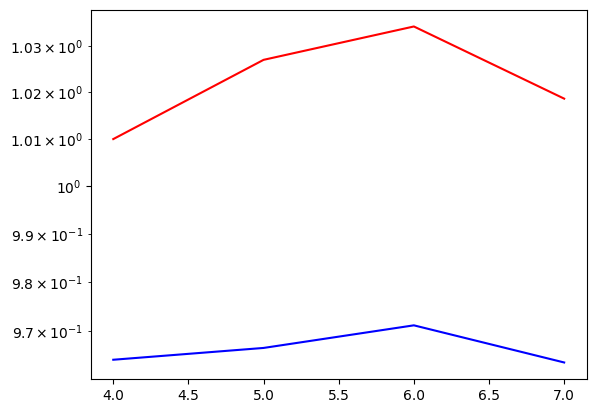

In [6]:
import matplotlib.pyplot as plt
import numpy as np

def mse(Y_true: np.ndarray, Y_pred: np.ndarray) -> float:
  return np.mean((Y_true - Y_pred)**2)

def test_train_plotter(degree: int = 3, learning_rate = 0.01, max_iterations = 500) -> tuple[float, float]:
  data = pd.read_csv('Data.csv')
  mse_avg_test = mse_avg_train = 0.0
  normalize(data)
  poly_transform(data, degree=degree)
  insert_dummy1s(data)
  # taking average for better prediction
  for _ in range(10):
    test, train = test_train_split(data)
    W = batch(train, learning_rate, max_iterations)
    X_test = test.iloc[:, :-1]
    Y_test = test.iloc[:, -1]
    X_train = train.iloc[:, :-1]
    Y_train = train.iloc[:, -1]
    mse_avg_test += mse(Y_test, X_test @ W)
    mse_avg_train += mse(Y_train, X_train @ W)
  return mse_avg_test/10, mse_avg_train/10

degrees = [1, 2, 3, 4]
errors = [test_train_plotter(degree=degree, learning_rate=0.01, max_iterations=500) for degree in degrees]
plt.plot(degrees, [i[0] for i in errors], color = 'red')
plt.plot(degrees, [i[1] for i in errors], color = 'blue')
plt.title('MSE vs Degree')
plt.xlabel('Degree')
plt.ylabel('MSE')
print(min(errors))
print(errors.index(min(errors))+1)
plt.show()
degrees = [4, 5, 6, 7, 8, 9]
errors = [test_train_plotter(degree=degree, learning_rate=0.01, max_iterations=500) for degree in degrees]
plt.plot(degrees, [i[0] for i in errors], color = 'red')
plt.plot(degrees, [i[1] for i in errors], color = 'blue')
plt.yscale('log')
plt.show()


**Inference:** We find that 3rd degree gives the least error with 0.01 learning rate. We also observe that higher degrees resulted in overflow of the error.

## Training and Testing Error vs Epoch

(0.9988638271467665, 0.9640454936180258)
6


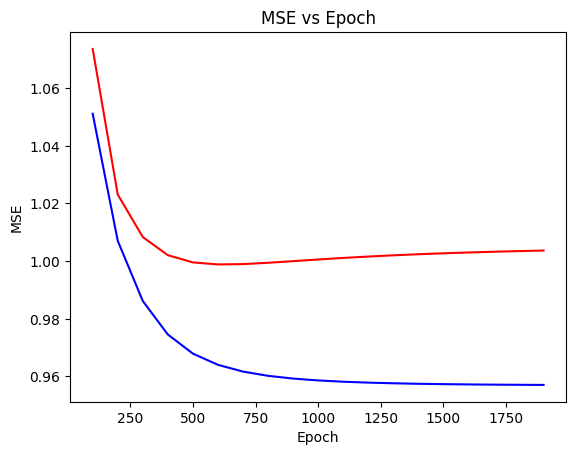

In [7]:
epochs = range(100, 2000, 100)
errors = [test_train_plotter(degree=3, learning_rate=0.01, max_iterations=epoch) for epoch in epochs]
plt.plot(epochs, [i[0] for i in errors], color = 'red')
plt.plot(epochs, [i[1] for i in errors], color = 'blue')
plt.title('MSE vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('MSE')
print(min(errors))
print(errors.index(min(errors))+1)
plt.show()

**Inference:** We observe that 600 is the best number of iterations for the given dataset, with the learning rate of 0.01.

### Plotting the best fit curve

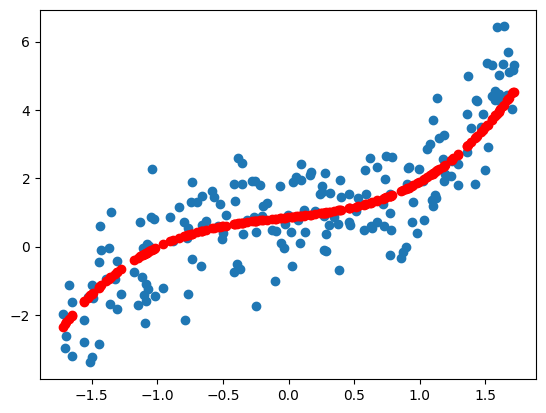

array([0.94265645, 0.42180693, 0.07739549, 1.05041119])

In [8]:
X_test_plot = test.iloc[:, 1]
X_test = test.iloc[:, :-1]
Y_test = test.iloc[:, -1]
plt.scatter(X_test_plot, Y_test)
W = batch(train, 0.01, 600)
plt.scatter(X_test_plot, X_test @ W.T, color='red')
plt.show()
W

# Task 4. Comparative Analysis

We observe that a polynomial model of degree 3, with learning rate of 0.01; trained with batch gradient descent algorithm for 600 iterations gives us the best result of 0.9988638271467665 testing error and 0.9640454936180258 training error (mean squared error).